In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV as gridsearchcv
from sklearn.metrics import mean_squared_error, make_scorer, r2_score, auc, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc

from scipy import stats

import math
import os
import random


In [2]:
## Move to correct folder for server.  Can remove before sending
os.chdir('/home/poblivsig/Dropbox/horses2')
print(os.getcwd())

/home/poblivsig/Dropbox/horses2


In [21]:
# Open the pre-processed csv
# Set the index to get rid of 'unnamed: 32' column
df = pd.read_csv('data/breast_cancer.csv', index_col=[32])

(569, 32)
(569, 32)


In [32]:
## Get info about breast cancer dataset
print(f'Shape\n{df.shape}')
print(f'Columns\n{df.columns}')
print(f'dtypes\n{df.dtypes}')
pd.set_option('display.max_columns', None)
print(f'Description\n{df.describe()}')
print(f'Info:\n{df.info}')
print(f'Check out the sample: {df.sample(n=1)}')
pd.set_option('display.max_columns', 5)

Shape
(569, 32)
Columns
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
dtypes
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
conc

/home/poblivsig/Dropbox/horses2/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


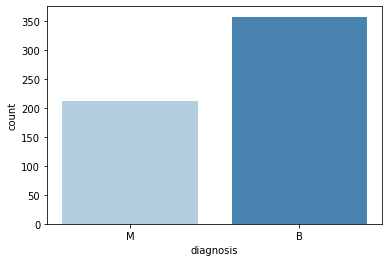

In [23]:
## Count the different diagnosis values
sns.countplot(df['diagnosis'],
              palette='Blues',
              label="Diagnoses Count", )
plt.plot()
plt.savefig('data/charts/bc_diag_countplot.png')

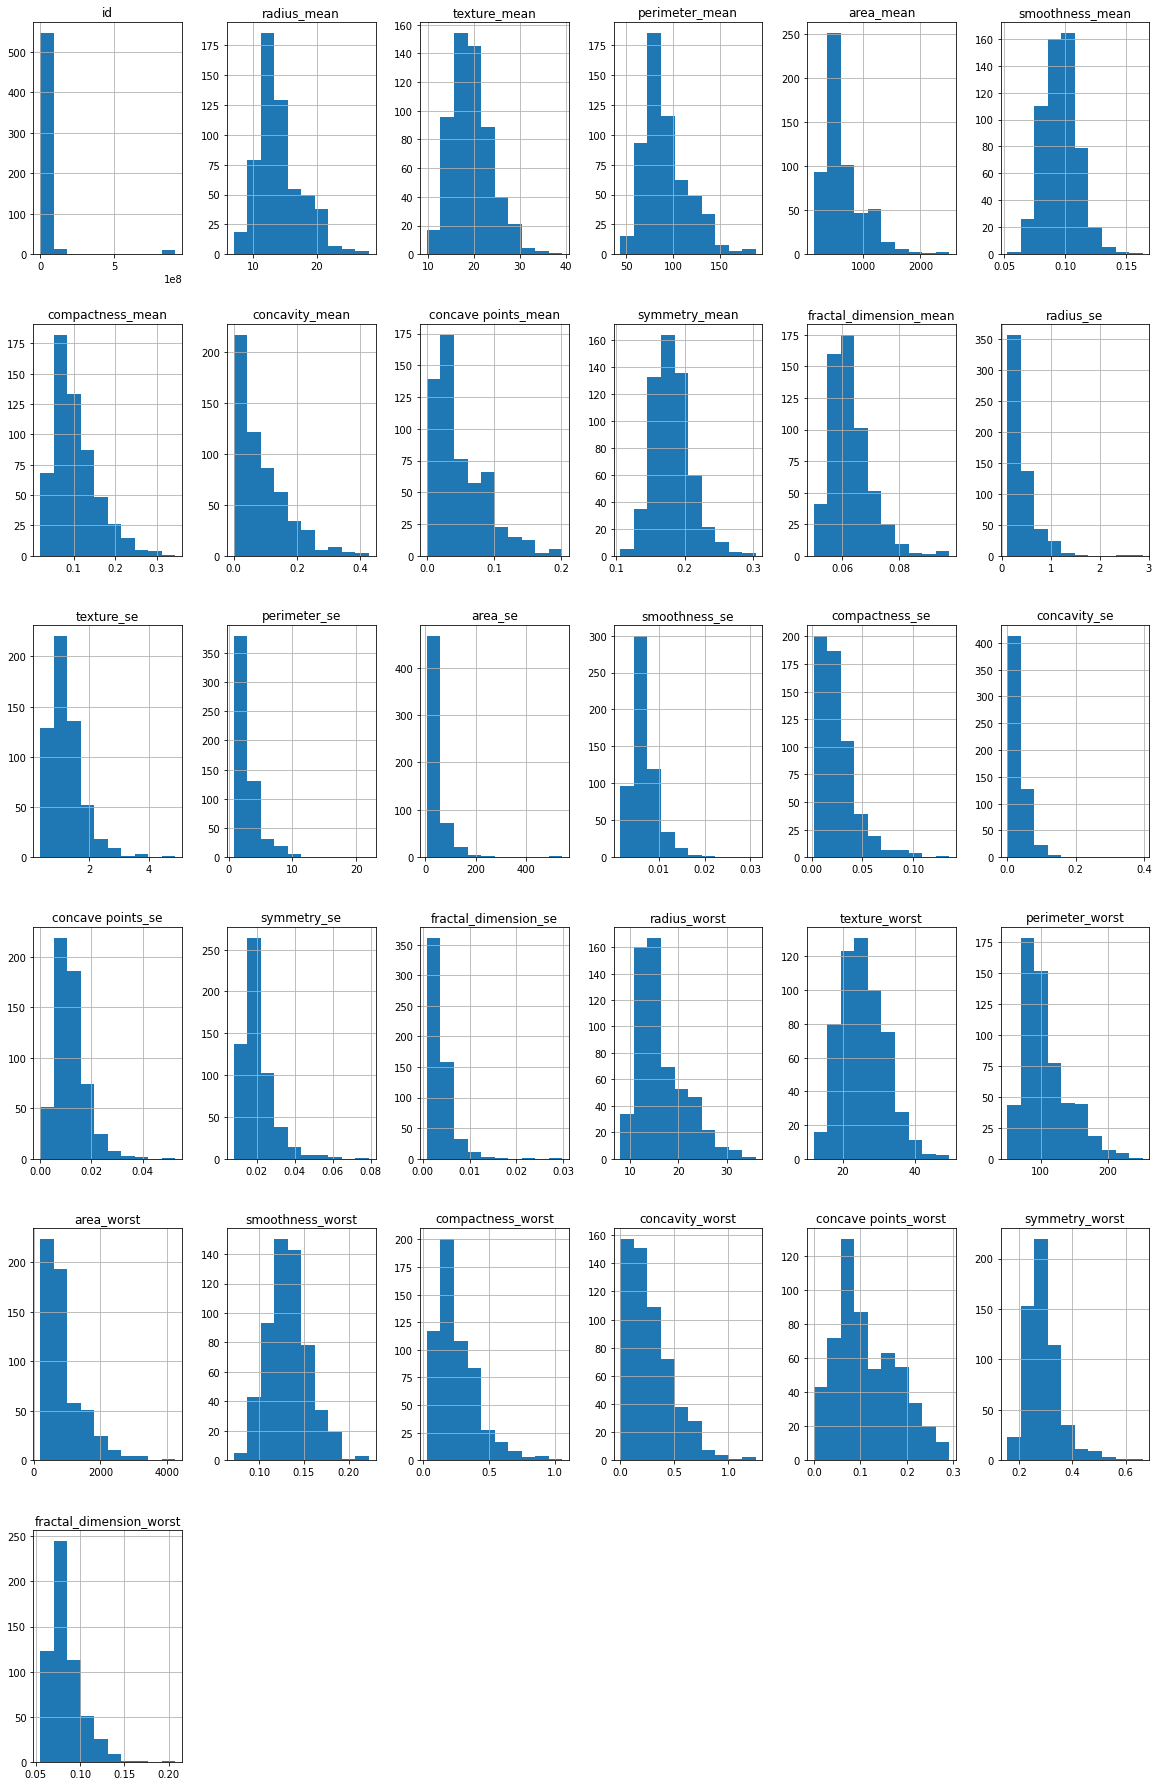

<Figure size 432x288 with 0 Axes>

In [30]:
# Create mini-histograms for each attribute

# First remove attributes that can't be charted
# df_density = df.__deepcopy__()
# df_density.drop('Unnamed: 32')
df.hist(bins=10,
        figsize=(20, 32))
plt.show()

# Build density plots
# df_density.plot(kind='density',
#                 subplots=True,
#                 sharex=False,
#                 layout=(8,5))
# plt.show()
plt.savefig('data/charts/bc_histogram_plots.png')


[]

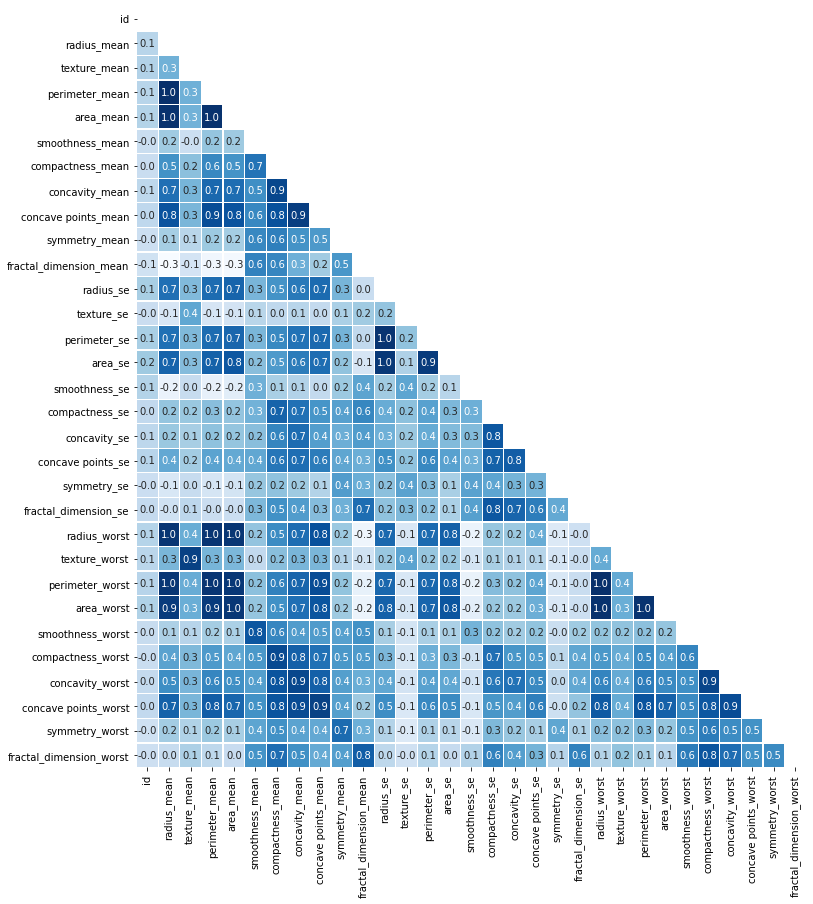

In [31]:
# Build a heatmap to find the attributes that correlate the most
f, ax = plt.subplots(figsize=(12, 14))
conf_matrix = np.triu(df.corr())
sns.heatmap(df.corr(),
            annot=True,
            cbar=0,
            linewidths=.3,
            fmt='.1f',
            mask=conf_matrix,
            cmap='Blues',
            ax=ax)
plt.plot()

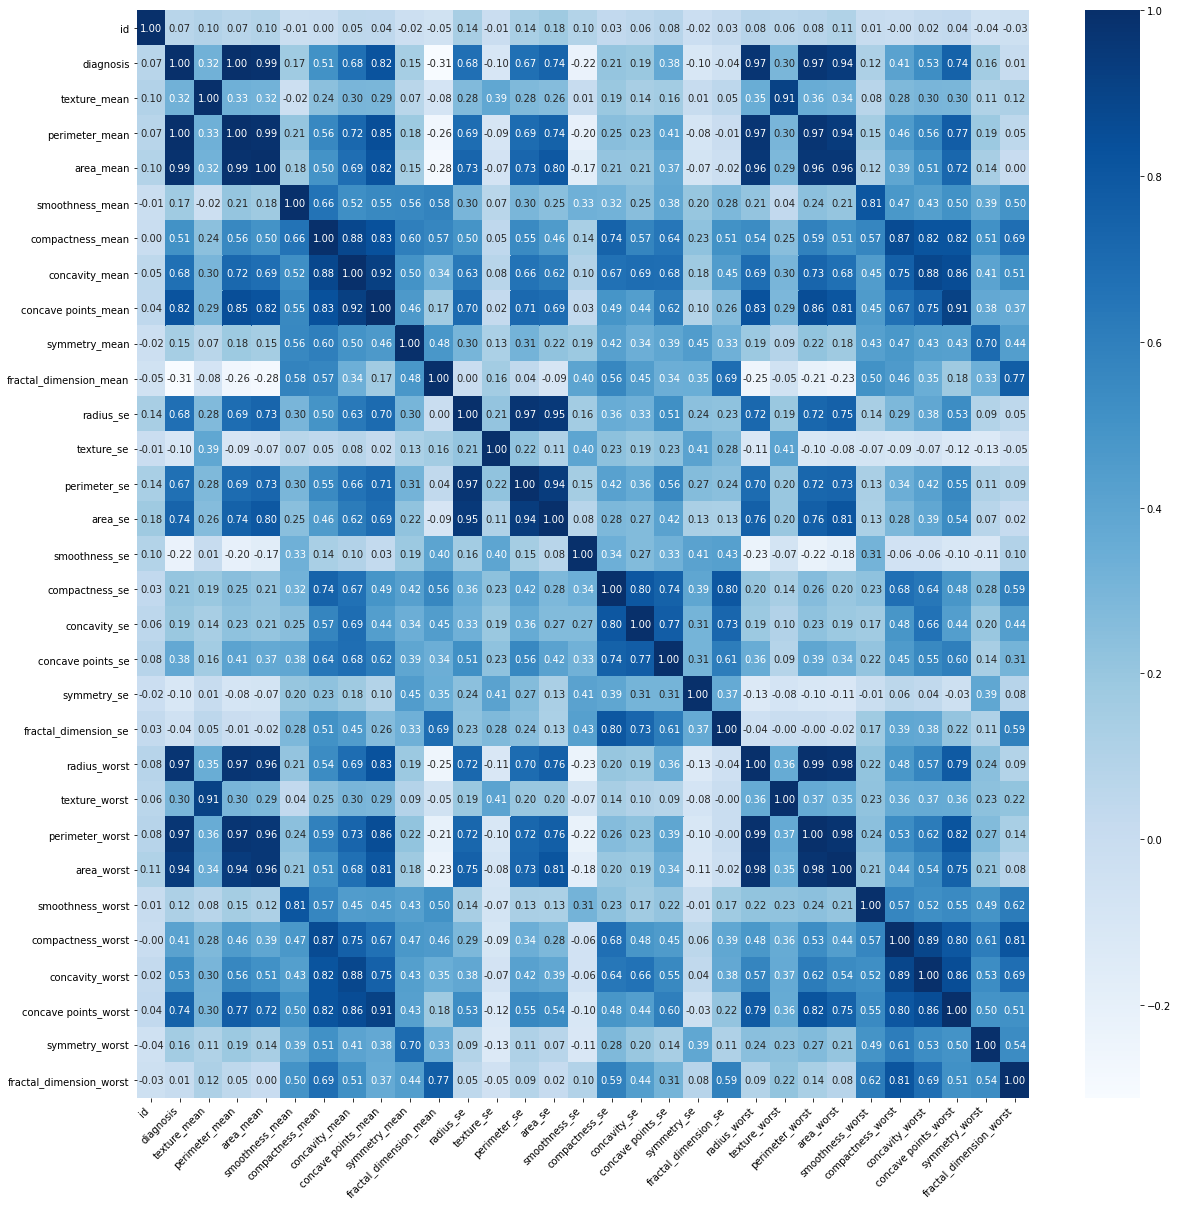

In [34]:
corrs = df.corr()
col_names = ['id',
             'diagnosis',
             'texture_mean',
             'perimeter_mean',
             'area_mean',
             'smoothness_mean',
             'compactness_mean',
             'concavity_mean',
             'concave points_mean',
             'symmetry_mean',
             'fractal_dimension_mean',
             'radius_se',
             'texture_se',
             'perimeter_se',
             'area_se',
             'smoothness_se',
             'compactness_se',
             'concavity_se',
             'concave points_se',
             'symmetry_se',
             'fractal_dimension_se',
             'radius_worst',
             'texture_worst',
             'perimeter_worst',
             'area_worst',
             'smoothness_worst',
             'compactness_worst',
             'concavity_worst',
             'concave points_worst',
             'symmetry_worst',
             'fractal_dimension_worst']


fig, ax = plt.subplots(figsize=(20, 20))

# Create color map
colormap = sns.diverging_palette(220,
                                 10,
                                 as_cmap=True)

# Create Heat Map, including annotations
# Put the floating point numbers in the map
sns.heatmap(corrs,
            cmap='Blues',
            fmt=".2f",
            annot=True)

ax.set_xticklabels(
    col_names,
    horizontalalignment='right',
    rotation=45)

ax.set_yticklabels(col_names)
plt.show()